In [1]:
import glob
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [132]:
spectrum_files = glob.glob('data/spectrum/spectrum*.csv')
spectrum_data = pd.DataFrame(columns=['Company', 'Date', 'Time'])

In [137]:
for f in spectrum_files:
    spectrum_data = spectrum_data.append(pd.read_csv(f))
spectrum_data['Date'] = pd.to_datetime(spectrum_data['Date'])
spectrum_data = spectrum_data.sort_values(by=['Date'])
spectrum_data = spectrum_data.reset_index(drop=True)

In [130]:
fig = px.histogram(spectrum_data, x="Date")
fig.show()

In [82]:
steam_data = pd.read_csv('data/steam-users.csv')
steam_data['DateTime'] = pd.to_datetime(steam_data['DateTime'])

csgo_data = pd.read_csv('data/csgo-players.csv')
csgo_data['DateTime'] = pd.to_datetime(csgo_data['DateTime'])


In [127]:
steam_weekly_avgs = steam_data.copy()
steam_weekly_avgs['DateTime'] = pd.to_datetime(steam_weekly_avgs['DateTime']) - pd.to_timedelta(7, unit='d')
steam_weekly_avgs = steam_weekly_avgs.groupby([pd.Grouper(key='DateTime', freq='W-MON')])['Users', 'In-Game'].sum().reset_index().sort_values('DateTime')
steam_weekly_avgs = pd.melt(steam_weekly_avgs, id_vars=['DateTime'], value_vars=['Users', 'In-Game'])

fig = px.line(steam_weekly_avgs, x='DateTime', y='value', color='variable')
fig.update_layout(
    title="Number of Steam Users Online",
    xaxis_title="Time",
    yaxis_title="Weekly Average",
    legend_title_text=''
)
fig.show()



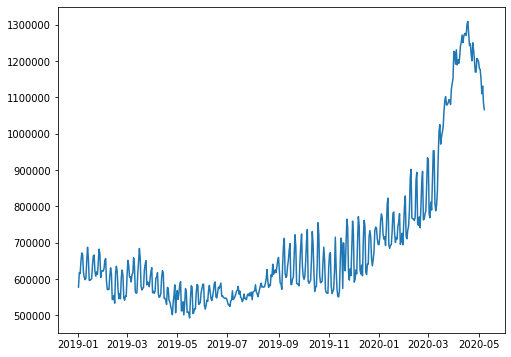

In [94]:
plt.figure(figsize=(8, 6))
plt.plot(csgo_data['DateTime'], csgo_data['Players'])